<a href="https://colab.research.google.com/github/namne21123-ops/Supply-Chain-Learning/blob/main/Day2_Automation_Seasonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

def process_sales_data(file_path):
  print("Starting Data Processing Engine...")

  df = pd.read_csv("/Superstore.csv")

  df['Postal Code'].fillna(5401, inplace=True)

  df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

  df['Year'] = df['Order Date'].dt.year
  df['Month'] = df['Order Date'].dt.month

  print("Data PROCESSING Complete! Dataset is clean and ready")
  return df

raw_file_path = "/content/Sample - /Superstore.csv"

df_clean = process_sales_data(raw_file_path)

print("--- Data Info ---")
print(df_clean.info())


Starting Data Processing Engine...
Data PROCESSING Complete! Dataset is clean and ready
--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     98

/tmp/ipython-input-1068645387.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(5401, inplace=True)


--- MONTHLY SALES DATA ---
Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64


<Axes: title={'center': '📅 SALES SEASONALITY (Monthly Trend)'}, xlabel='Month', ylabel='Total Sales ($)'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


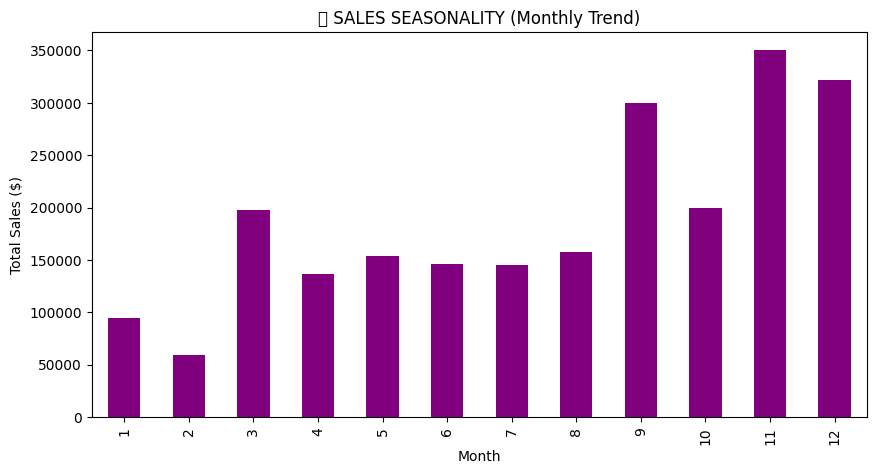

In [13]:
monthly_sales = df_clean.groupby('Month')['Sales'].sum()

print("--- MONTHLY SALES DATA ---")
print(monthly_sales)

monthly_sales.plot(kind='bar', figsize=(10, 5), color='Purple', title='📅 SALES SEASONALITY (Monthly Trend)', ylabel='Total Sales ($)')


--- SEGMENT SALES DATA ---
Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64


<Axes: title={'center': 'CUSTOMER SEGMENATION (Who buys the most)'}>

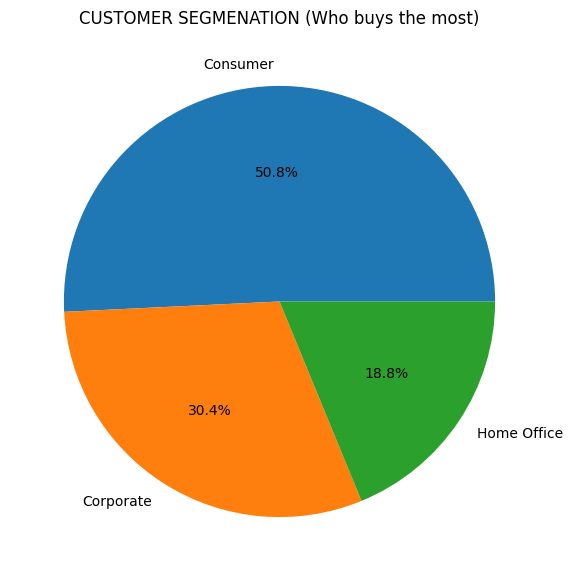

In [14]:
segment_sales = df_clean.groupby('Segment')['Sales'].sum()

print("--- SEGMENT SALES DATA ---")
print(segment_sales)

segment_sales.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%', title='CUSTOMER SEGMENATION (Who buys the most)', ylabel="")